In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(26) # 随机种子，控制生成的数据
X = 2 * np.random.rand(120, 1)
y = 4 + 3 * X + np.random.randn(120, 1)

(0.0, 2.0, 0.0, 15.0)

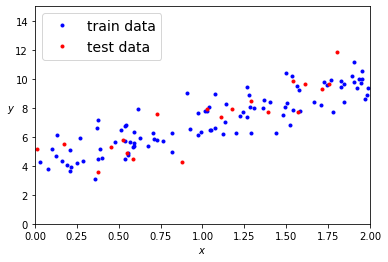

In [3]:
plt.plot(X[:100], y[:100], "b.", label = 'train data') # 蓝点-训练数据
plt.plot(X[100:], y[100:], "r.", label = 'test data') # 红点-测试数据
plt.xlabel("$x$") # x-横轴
plt.ylabel("$y$", rotation=0) # y-纵轴,rotation:旋转
plt.legend(loc="upper left", fontsize=14) # 图例
plt.axis([0, 2, 0, 15]) # 画图范围区间

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()#线性回归算法
lin_reg.fit(X[:100], y[:100]) # 利用训练数据求解模型参数
w_best, b_best = lin_reg.coef_, lin_reg.intercept_ # 分别对应参数w,b
print("w_best = ",w_best,"\nb_best = ",b_best)

w_best =  [[2.87243541]] 
b_best =  [4.10572572]


In [5]:
X_new = np.array([[2],[0]])
y_predict = X_new * w_best + b_best
y_predict

array([[9.85059654],
       [4.10572572]])

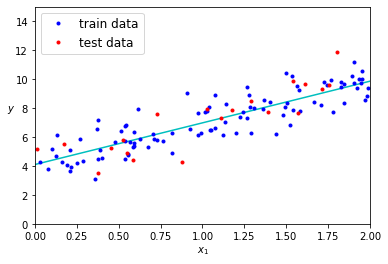

In [6]:
plt.plot(X_new, y_predict, "c-")
plt.plot(X[:100], y[:100], "b.", label = 'train data')
plt.plot(X[100:], y[100:], "r.", label = 'test data')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left", fontsize=12)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
eta = 0.1  # 学习率
T = 1000  # 迭代次数
m = 100  # 训练样本个数

In [8]:
def gd(m, eta = 0.1, T = 1000):
    w,b = np.random.randn(2,1)
    for t in range(T):
      grad_w,grad_b =0,0
      for i in range(m):
        grad_w += 2/m*(w*X[i]+b-y[i])*X[i]
        grad_b += 2/m*(w*X[i]+b-y[i])
      w = w-eta * grad_w
      b = b-eta * grad_b
    return w,b


In [9]:
w,b = gd(100,0.1,1000)
print("w = ",w,"\nb = ",b)

w =  [2.87243541] 
b =  [4.10572572]


w =  [2.87243541] 
b =  [4.10572572]


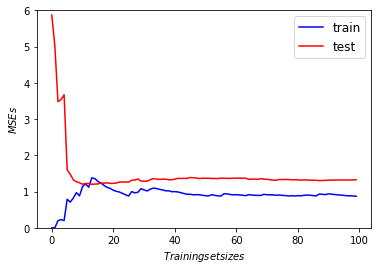

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

np.random.seed(26) # 随机种子，控制生成的数据
X = 2 * np.random.rand(120, 1)#是从标准正态分布中返回一个或多个样本值
y = 4 + 3 * X + np.random.randn(120, 1)#随机样本位于[0,1)
eta = 0.1  # 学习率
T = 1000  # 迭代次数
m = 100  # 训练样本个数
def gd(m, eta = 0.1, T = 1000):
    w,b = np.random.randn(2,1)
    for t in range(T):
      grad_w,grad_b =0,0
      for i in range(m):
        grad_w += 2/m*(w*X[i]+b-y[i])*X[i]
        grad_b += 2/m*(w*X[i]+b-y[i])
      w = w-eta * grad_w
      b = b-eta * grad_b
    return w,b
w,b = gd(100,0.1,1000)
print("w = ",w,"\nb = ",b)
# 定义预测函数
'''def predict(x_new,w,b):
    return w*x_new + b'''
'''def Mse(y,y_pred):
    m = len(y)
    mse = 0
    for i in range(m):
        mse += (y_pred[i] - y[i])**2
    return mse/m'''
m_train= 100
m_list2=[]
m_list3=[]
for j in range (1,101):
   MSE_train = 0
   w, b = gd(j, 0.1, 1000)
   for i in range(j):
        #w, b = gd(i, 0.1, 1000)
        MSE_train += (w*X[i] + b - y[i])**2 # 累加每个样本的均方误差
   MSE_test = 0
   for  i in range (20):
        MSE_test += (w * X[100 + i] + b - y[100 + i]) ** 2
   MSE_test = MSE_test/20
   MSE_train = MSE_train/j
   m_list2.append(MSE_train)
   m_list3.append(MSE_test)

# 定义均方误差计算函数
#-测试集
"""m_test = 20
MSE_test = 0
m_list3=[]
for i in range(m_test):
    MSE_test += (w*X[100+i] + b - y[100+i])**2
    A = np.array(MSE_test)
    m_list3.append(A)
MSE_test = MSE_test/m_test
print("测试集均方误差：", MSE_test)
"""
lista=[]
listb=[]
for i in range(100):
    lista.append(i)

plt.plot(lista[:], m_list2[:], "b-", label = 'train')#100个x，100个训练集均方差
plt.plot(lista[:], m_list3[:], "r-", label = 'test')#20个x，20个测试集均方差
plt.xlabel("$Training set sizes$")
plt.ylabel("$MSEs$", rotation=90)
plt.ylim(0,6)
plt.legend(loc="upper right", fontsize=12)
plt.show()
